<a href="https://colab.research.google.com/github/PriGith/DataMining2/blob/main/notebooks/Assignment3_Priyanka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 3**



 **Submitted By: Priyanka Gandhi**


**Language: Python**

**Importing necessary packages**

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

In [27]:
from google.colab import files
uploaded = files.upload()

Saving large.csv to large (1).csv


Reading the CSV File

In [28]:
import io
df = pd.read_csv(io.BytesIO(uploaded['large.csv']))
# Dataset is now stored in a Pandas Dataframe

In [29]:
df

,N1,N2,N4,N16,N39,N3
0,1,1,2,1,1,2
1,2,2,2,1,1,1
2,1,1,1,1,1,1
3,2,2,2,1,1,1
4,2,2,2,1,1,2
...,...,...,...,...,...,...
9995,1,1,2,1,1,1
9996,1,1,1,2,1,1
9997,1,1,1,2,2,2
9998,1,1,1,2,1,2


In [30]:
df.head()

,N1,N2,N4,N16,N39,N3
0,1,1,2,1,1,2
1,2,2,2,1,1,1
2,1,1,1,1,1,1
3,2,2,2,1,1,1
4,2,2,2,1,1,2


**Constraint Based Algorithm : Python uses PC** 

In [31]:
from pgmpy.estimators import PC
df['sum'] = df.sum(axis=1)
print(df)

      N1  N2  N4  N16  N39  N3  sum
0      1   1   2    1    1   2    8
1      2   2   2    1    1   1    9
2      1   1   1    1    1   1    6
3      2   2   2    1    1   1    9
4      2   2   2    1    1   2   10
...   ..  ..  ..  ...  ...  ..  ...
9995   1   1   2    1    1   1    7
9996   1   1   1    2    1   1    7
9997   1   1   1    2    2   2    9
9998   1   1   1    2    1   2    8
9999   2   2   2    1    1   2   10

[10000 rows x 7 columns]


In [32]:
c = PC(df)
model = c.estimate()
print(model.edges())

  0%|          | 0/5 [00:00<?, ?it/s]

[('N4', 'sum'), ('N4', 'N2'), ('N4', 'N16'), ('N39', 'sum'), ('N3', 'N2'), ('N3', 'sum'), ('N2', 'sum'), ('N16', 'sum'), ('N16', 'N39'), ('N1', 'N2'), ('N1', 'sum'), ('N1', 'N4')]


**Score Based Algorithm: Hill Climb Algorithm**

In [33]:
from pgmpy.estimators import HillClimbSearch
est = HillClimbSearch(df)
best_model = est.estimate()
sorted(best_model.nodes())

  0%|          | 0/1000000 [00:00<?, ?it/s]

['N1', 'N16', 'N2', 'N3', 'N39', 'N4', 'sum']

**Scoring Method**

In [34]:
import bnlearn as bn

In [63]:
# Using DAG for Bayesian structure learning:
DAG = bn.structure_learning.fit(df)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]


In [36]:
# print adjacency matrix
print(DAG['adjmat'])

target     N1     N2     N4    N16    N39     N3    sum
source                                                 
N1      False  False   True  False  False  False   True
N2       True  False   True  False  False  False   True
N4      False  False  False   True  False  False   True
N16     False  False  False  False   True  False   True
N39     False  False  False  False  False  False   True
N3      False   True  False  False  False  False   True
sum     False  False  False  False  False  False  False


[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


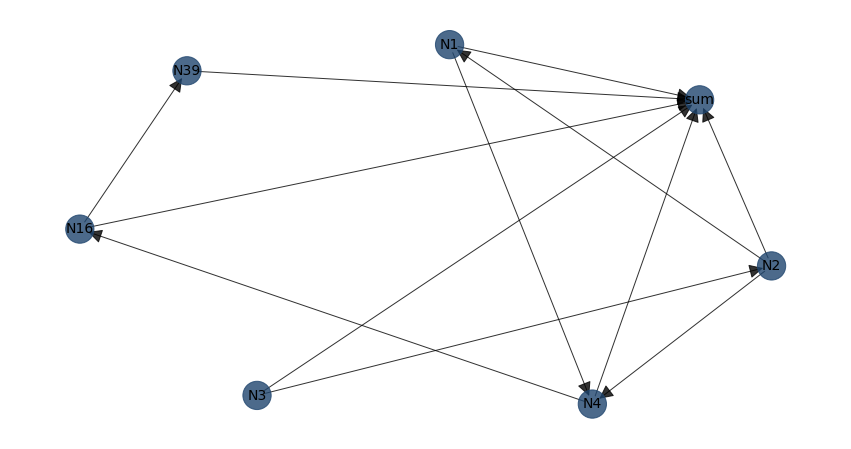

In [37]:
# Plot
G = bn.plot(DAG)

In [38]:
# Interactive plotting
G = bn.plot(DAG, interactive=True)

[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


**Calculating score  with different types of methods: BIC ,K2 and BDEU in different  scoring methods**

In [40]:
# 'Calling hillclimbsearch with scoring type BIC'
model_hill_bic  = bn.structure_learning.fit(df, methodtype='hc', scoretype='bic')



[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]


In [42]:
model_hill_bic

{'adjmat': target     N1     N2     N4    N16    N39     N3    sum
 source                                                 
 N1      False  False   True  False  False  False   True
 N2       True  False   True  False  False  False   True
 N4      False  False  False   True  False  False   True
 N16     False  False  False  False   True  False   True
 N39     False  False  False  False  False  False   True
 N3      False   True  False  False  False  False   True
 sum     False  False  False  False  False  False  False,
 'config': {'black_list': None,
  'bw_list_method': None,
  'class_node': None,
  'epsilon': 0.0001,
  'fixed_edges': set(),
  'max_indegree': None,
  'max_iter': 1000000.0,
  'method': 'hc',
  'return_all_dags': False,
  'root_node': None,
  'scoring': 'bic',
  'tabu_length': 100,
  'verbose': 3,
  'white_list': None},
 'model': <pgmpy.base.DAG.DAG at 0x7f5b3a15f5d0>,
 'model_edges': [('N1', 'sum'),
  ('N1', 'N4'),
  ('N2', 'N1'),
  ('N2', 'sum'),
  ('N2', 'N4'),
  ('N4'

In [68]:
pip install tabulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
# 'Calling hillclimbsearch with scoring type K2'#
model_hill_k2   = bn.structure_learning.fit(df, methodtype='hc', scoretype='k2')


[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [k2]


In [43]:
model_hill_k2

{'adjmat': target     N1     N2     N4    N16    N39     N3    sum
 source                                                 
 N1      False   True   True   True  False   True  False
 N2      False  False   True   True  False   True  False
 N4      False  False  False   True  False   True  False
 N16     False  False  False  False  False   True  False
 N39      True   True   True   True  False   True   True
 N3      False  False  False  False  False  False  False
 sum      True   True   True   True  False   True  False,
 'config': {'black_list': None,
  'bw_list_method': None,
  'class_node': None,
  'epsilon': 0.0001,
  'fixed_edges': set(),
  'max_indegree': None,
  'max_iter': 1000000.0,
  'method': 'hc',
  'return_all_dags': False,
  'root_node': None,
  'scoring': 'k2',
  'tabu_length': 100,
  'verbose': 3,
  'white_list': None},
 'model': <pgmpy.base.DAG.DAG at 0x7f5b3291cfd0>,
 'model_edges': [('N1', 'N2'),
  ('N1', 'N4'),
  ('N1', 'N3'),
  ('N1', 'N16'),
  ('N2', 'N3'),
  ('N2', 

In [65]:
# 'Calling hillclimbsearch with scoring type BDEU'#
model_hill_bdeu = bn.structure_learning.fit(df, methodtype='hc', scoretype='bdeu')

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bdeu]


In [45]:
model_hill_bdeu

{'adjmat': target     N1     N2     N4    N16    N39     N3    sum
 source                                                 
 N1      False  False   True  False  False  False   True
 N2       True  False   True  False  False   True   True
 N4      False  False  False   True  False  False   True
 N16     False  False  False  False   True  False   True
 N39     False  False  False  False  False  False   True
 N3      False  False  False  False  False  False   True
 sum     False  False  False  False  False  False  False,
 'config': {'black_list': None,
  'bw_list_method': None,
  'class_node': None,
  'epsilon': 0.0001,
  'fixed_edges': set(),
  'max_indegree': None,
  'max_iter': 1000000.0,
  'method': 'hc',
  'return_all_dags': False,
  'root_node': None,
  'scoring': 'bdeu',
  'tabu_length': 100,
  'verbose': 3,
  'white_list': None},
 'model': <pgmpy.base.DAG.DAG at 0x7f5b33304ad0>,
 'model_edges': [('N1', 'sum'),
  ('N1', 'N4'),
  ('N2', 'N1'),
  ('N2', 'sum'),
  ('N2', 'N4'),
  ('N2

In [66]:
## 'Calling Constraint search algorithm with scoring type K2'#
model_constraint_k2   = bn.structure_learning.fit(df, methodtype='cs', scoretype='k2')

[bnlearn] >Computing best DAG using [cs]


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [50]:
model_constraint_k2

{'adjmat': target     N4     N1    sum     N2    N39     N3    N16
 source                                                 
 N4      False   True   True   True  False  False  False
 N1      False  False   True  False  False  False  False
 sum     False  False  False  False  False  False  False
 N2      False   True   True  False  False  False  False
 N39     False  False   True  False  False  False   True
 N3      False  False   True   True  False  False  False
 N16      True  False   True  False  False  False  False,
 'config': {'black_list': None,
  'bw_list_method': None,
  'class_node': None,
  'epsilon': 0.0001,
  'fixed_edges': set(),
  'max_indegree': None,
  'max_iter': 1000000.0,
  'method': 'cs',
  'return_all_dags': False,
  'root_node': None,
  'scoring': 'k2',
  'tabu_length': 100,
  'verbose': 3,
  'white_list': None},
 'dag': <pgmpy.base.DAG.DAG at 0x7f5b35cb3a10>,
 'dag_edges': OutEdgeView([('N4', 'sum'), ('N4', 'N1'), ('N4', 'N2'), ('N1', 'sum'), ('N2', 'sum'), ('N2', 

In [48]:
# Calling Constraint algorithm with scoring type BDEU'#
model_constraint_bdeu = bn.structure_learning.fit(df, methodtype='cs', scoretype='bdeu')

[bnlearn] >Computing best DAG using [cs]


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [51]:
model_constraint_bdeu

{'adjmat': target     N4     N1    sum     N2    N39     N3    N16
 source                                                 
 N4      False   True   True   True  False  False  False
 N1      False  False   True  False  False  False  False
 sum     False  False  False  False  False  False  False
 N2      False   True   True  False  False  False  False
 N39     False  False   True  False  False  False   True
 N3      False  False   True   True  False  False  False
 N16      True  False   True  False  False  False  False,
 'config': {'black_list': None,
  'bw_list_method': None,
  'class_node': None,
  'epsilon': 0.0001,
  'fixed_edges': set(),
  'max_indegree': None,
  'max_iter': 1000000.0,
  'method': 'cs',
  'return_all_dags': False,
  'root_node': None,
  'scoring': 'bdeu',
  'tabu_length': 100,
  'verbose': 3,
  'white_list': None},
 'dag': <pgmpy.base.DAG.DAG at 0x7f5b3291cbd0>,
 'dag_edges': OutEdgeView([('N4', 'sum'), ('N4', 'N1'), ('N4', 'N2'), ('N1', 'sum'), ('N2', 'sum'), ('N2'

In [49]:
#'Calling Constrint algorithm with scoring type BIC'#
model_constraint_bic  = bn.structure_learning.fit(df, methodtype='cs', scoretype='bic')

[bnlearn] >Computing best DAG using [cs]


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [52]:
model_constraint_bic

{'adjmat': target     N4     N1    sum     N2    N39     N3    N16
 source                                                 
 N4      False   True   True   True  False  False  False
 N1      False  False   True  False  False  False  False
 sum     False  False  False  False  False  False  False
 N2      False   True   True  False  False  False  False
 N39     False  False   True  False  False  False   True
 N3      False  False   True   True  False  False  False
 N16      True  False   True  False  False  False  False,
 'config': {'black_list': None,
  'bw_list_method': None,
  'class_node': None,
  'epsilon': 0.0001,
  'fixed_edges': set(),
  'max_indegree': None,
  'max_iter': 1000000.0,
  'method': 'cs',
  'return_all_dags': False,
  'root_node': None,
  'scoring': 'bic',
  'tabu_length': 100,
  'verbose': 3,
  'white_list': None},
 'dag': <pgmpy.base.DAG.DAG at 0x7f5b33689a90>,
 'dag_edges': OutEdgeView([('N4', 'sum'), ('N4', 'N1'), ('N4', 'N2'), ('N1', 'sum'), ('N2', 'sum'), ('N2',

**Plotting Score Graph**

**Making Interactive Plot of Score models of HillClimb Algorithm and Constraint based algorithm**

Plotting Hill based using score BIC

In [53]:
bn.plot(model_hill_bic, interactive=True)

[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


{'G': <networkx.classes.digraph.DiGraph at 0x7f5b32c88890>,
 'edge_properties': {('N1', 'N4'): {'color': '#000000', 'weight': 1},
  ('N1', 'sum'): {'color': '#000000', 'weight': 1},
  ('N16', 'N39'): {'color': '#000000', 'weight': 1},
  ('N16', 'sum'): {'color': '#000000', 'weight': 1},
  ('N2', 'N1'): {'color': '#000000', 'weight': 1},
  ('N2', 'N4'): {'color': '#000000', 'weight': 1},
  ('N2', 'sum'): {'color': '#000000', 'weight': 1},
  ('N3', 'N2'): {'color': '#000000', 'weight': 1},
  ('N3', 'sum'): {'color': '#000000', 'weight': 1},
  ('N39', 'sum'): {'color': '#000000', 'weight': 1},
  ('N4', 'N16'): {'color': '#000000', 'weight': 1},
  ('N4', 'sum'): {'color': '#000000', 'weight': 1}},
 'node_properties': {'N1': {'node_color': '#1f456e', 'node_size': 10},
  'N16': {'node_color': '#1f456e', 'node_size': 10},
  'N2': {'node_color': '#1f456e', 'node_size': 10},
  'N3': {'node_color': '#1f456e', 'node_size': 10},
  'N39': {'node_color': '#1f456e', 'node_size': 10},
  'N4': {'node_c

Plotting Hill based using score K2

In [55]:
bn.plot(model_hill_k2, interactive=True)

[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


{'G': <networkx.classes.digraph.DiGraph at 0x7f5b33c0e690>,
 'edge_properties': {('N1', 'N16'): {'color': '#000000', 'weight': 1},
  ('N1', 'N2'): {'color': '#000000', 'weight': 1},
  ('N1', 'N3'): {'color': '#000000', 'weight': 1},
  ('N1', 'N4'): {'color': '#000000', 'weight': 1},
  ('N16', 'N3'): {'color': '#000000', 'weight': 1},
  ('N2', 'N16'): {'color': '#000000', 'weight': 1},
  ('N2', 'N3'): {'color': '#000000', 'weight': 1},
  ('N2', 'N4'): {'color': '#000000', 'weight': 1},
  ('N39', 'N1'): {'color': '#000000', 'weight': 1},
  ('N39', 'N16'): {'color': '#000000', 'weight': 1},
  ('N39', 'N2'): {'color': '#000000', 'weight': 1},
  ('N39', 'N3'): {'color': '#000000', 'weight': 1},
  ('N39', 'N4'): {'color': '#000000', 'weight': 1},
  ('N39', 'sum'): {'color': '#000000', 'weight': 1},
  ('N4', 'N16'): {'color': '#000000', 'weight': 1},
  ('N4', 'N3'): {'color': '#000000', 'weight': 1},
  ('sum', 'N1'): {'color': '#000000', 'weight': 1},
  ('sum', 'N16'): {'color': '#000000', 'w

Plotting HillClimb Algorithm with score type BDEU

In [56]:
 bn.plot(model_hill_bdeu, interactive=True)

[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


{'G': <networkx.classes.digraph.DiGraph at 0x7f5b36cebb90>,
 'edge_properties': {('N1', 'N4'): {'color': '#000000', 'weight': 1},
  ('N1', 'sum'): {'color': '#000000', 'weight': 1},
  ('N16', 'N39'): {'color': '#000000', 'weight': 1},
  ('N16', 'sum'): {'color': '#000000', 'weight': 1},
  ('N2', 'N1'): {'color': '#000000', 'weight': 1},
  ('N2', 'N3'): {'color': '#000000', 'weight': 1},
  ('N2', 'N4'): {'color': '#000000', 'weight': 1},
  ('N2', 'sum'): {'color': '#000000', 'weight': 1},
  ('N3', 'sum'): {'color': '#000000', 'weight': 1},
  ('N39', 'sum'): {'color': '#000000', 'weight': 1},
  ('N4', 'N16'): {'color': '#000000', 'weight': 1},
  ('N4', 'sum'): {'color': '#000000', 'weight': 1}},
 'node_properties': {'N1': {'node_color': '#1f456e', 'node_size': 10},
  'N16': {'node_color': '#1f456e', 'node_size': 10},
  'N2': {'node_color': '#1f456e', 'node_size': 10},
  'N3': {'node_color': '#1f456e', 'node_size': 10},
  'N39': {'node_color': '#1f456e', 'node_size': 10},
  'N4': {'node_c

Plotting Constraint Algorithm with K2 score

In [58]:
bn.plot(model_constraint_k2, interactive=True)

[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


{'G': <networkx.classes.digraph.DiGraph at 0x7f5b33c68490>,
 'edge_properties': {('N1', 'sum'): {'color': '#000000', 'weight': 1},
  ('N16', 'N4'): {'color': '#000000', 'weight': 1},
  ('N16', 'sum'): {'color': '#000000', 'weight': 1},
  ('N2', 'N1'): {'color': '#000000', 'weight': 1},
  ('N2', 'sum'): {'color': '#000000', 'weight': 1},
  ('N3', 'N2'): {'color': '#000000', 'weight': 1},
  ('N3', 'sum'): {'color': '#000000', 'weight': 1},
  ('N39', 'N16'): {'color': '#000000', 'weight': 1},
  ('N39', 'sum'): {'color': '#000000', 'weight': 1},
  ('N4', 'N1'): {'color': '#000000', 'weight': 1},
  ('N4', 'N2'): {'color': '#000000', 'weight': 1},
  ('N4', 'sum'): {'color': '#000000', 'weight': 1}},
 'node_properties': {'N1': {'node_color': '#1f456e', 'node_size': 10},
  'N16': {'node_color': '#1f456e', 'node_size': 10},
  'N2': {'node_color': '#1f456e', 'node_size': 10},
  'N3': {'node_color': '#1f456e', 'node_size': 10},
  'N39': {'node_color': '#1f456e', 'node_size': 10},
  'N4': {'node_c

In [59]:
bn.plot(model_constraint_bdeu, interactive=True)

[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


{'G': <networkx.classes.digraph.DiGraph at 0x7f5b32e28250>,
 'edge_properties': {('N1', 'sum'): {'color': '#000000', 'weight': 1},
  ('N16', 'N4'): {'color': '#000000', 'weight': 1},
  ('N16', 'sum'): {'color': '#000000', 'weight': 1},
  ('N2', 'N1'): {'color': '#000000', 'weight': 1},
  ('N2', 'sum'): {'color': '#000000', 'weight': 1},
  ('N3', 'N2'): {'color': '#000000', 'weight': 1},
  ('N3', 'sum'): {'color': '#000000', 'weight': 1},
  ('N39', 'N16'): {'color': '#000000', 'weight': 1},
  ('N39', 'sum'): {'color': '#000000', 'weight': 1},
  ('N4', 'N1'): {'color': '#000000', 'weight': 1},
  ('N4', 'N2'): {'color': '#000000', 'weight': 1},
  ('N4', 'sum'): {'color': '#000000', 'weight': 1}},
 'node_properties': {'N1': {'node_color': '#1f456e', 'node_size': 10},
  'N16': {'node_color': '#1f456e', 'node_size': 10},
  'N2': {'node_color': '#1f456e', 'node_size': 10},
  'N3': {'node_color': '#1f456e', 'node_size': 10},
  'N39': {'node_color': '#1f456e', 'node_size': 10},
  'N4': {'node_c

In [60]:
bn.plot(model_constraint_bic, interactive=True)

[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


{'G': <networkx.classes.digraph.DiGraph at 0x7f5b35fe9910>,
 'edge_properties': {('N1', 'sum'): {'color': '#000000', 'weight': 1},
  ('N16', 'N4'): {'color': '#000000', 'weight': 1},
  ('N16', 'sum'): {'color': '#000000', 'weight': 1},
  ('N2', 'N1'): {'color': '#000000', 'weight': 1},
  ('N2', 'sum'): {'color': '#000000', 'weight': 1},
  ('N3', 'N2'): {'color': '#000000', 'weight': 1},
  ('N3', 'sum'): {'color': '#000000', 'weight': 1},
  ('N39', 'N16'): {'color': '#000000', 'weight': 1},
  ('N39', 'sum'): {'color': '#000000', 'weight': 1},
  ('N4', 'N1'): {'color': '#000000', 'weight': 1},
  ('N4', 'N2'): {'color': '#000000', 'weight': 1},
  ('N4', 'sum'): {'color': '#000000', 'weight': 1}},
 'node_properties': {'N1': {'node_color': '#1f456e', 'node_size': 10},
  'N16': {'node_color': '#1f456e', 'node_size': 10},
  'N2': {'node_color': '#1f456e', 'node_size': 10},
  'N3': {'node_color': '#1f456e', 'node_size': 10},
  'N39': {'node_color': '#1f456e', 'node_size': 10},
  'N4': {'node_c

**Choosing different dataset and performing confusion matrix and diving into true and learned dataset**

[bnlearn] >Import <asia>
[bnlearn] >Loading bif file </usr/local/lib/python3.7/dist-packages/bnlearn/data/asia.bif>
[bnlearn] >Checking CPDs..
[bnlearn] >Check for DAG structure. Correct: True
[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


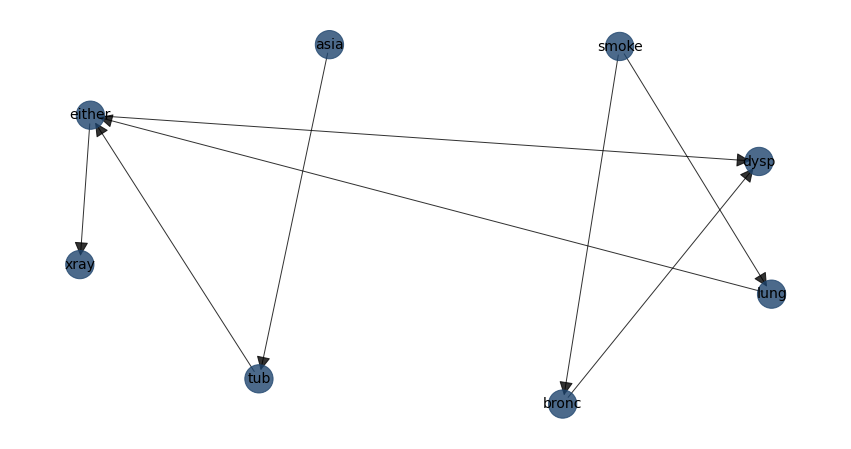

In [78]:
## importing different dataset and use confusion matrix

import bnlearn as bn
# Loading the  asia DAG
model_true1 = bn.import_DAG('asia')
# plotting the ground truth of the data
G = bn.plot(model_true1)

In [73]:
# Dataset sampling
df1 = bn.sampling(model_true, n=10000)


[bnlearn] >Forward sampling for 10000 samples..


  0%|          | 0/8 [00:00<?, ?it/s]

In [74]:
# Structure learning of sampled dataset
model_learned = bn.structure_learning.fit(df1, methodtype='hc', scoretype='bic')

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]


In [75]:
model_learned

{'adjmat': target   asia    tub  smoke   lung  bronc  either   xray   dysp
 source                                                         
 asia    False   True  False  False  False   False  False  False
 tub     False  False  False  False  False    True  False  False
 smoke   False  False  False   True   True   False  False  False
 lung    False  False  False  False  False    True  False  False
 bronc   False  False  False  False  False   False  False   True
 either  False  False  False  False  False   False   True   True
 xray    False  False  False  False  False   False  False  False
 dysp    False  False  False  False  False   False  False  False,
 'config': {'black_list': None,
  'bw_list_method': None,
  'class_node': None,
  'epsilon': 0.0001,
  'fixed_edges': set(),
  'max_indegree': None,
  'max_iter': 1000000.0,
  'method': 'hc',
  'return_all_dags': False,
  'root_node': None,
  'scoring': 'bic',
  'tabu_length': 100,
  'verbose': 3,
  'white_list': None},
 'model': <pgmpy.

[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model
[bnlearn] >Existing coordinates from <pos> are used.


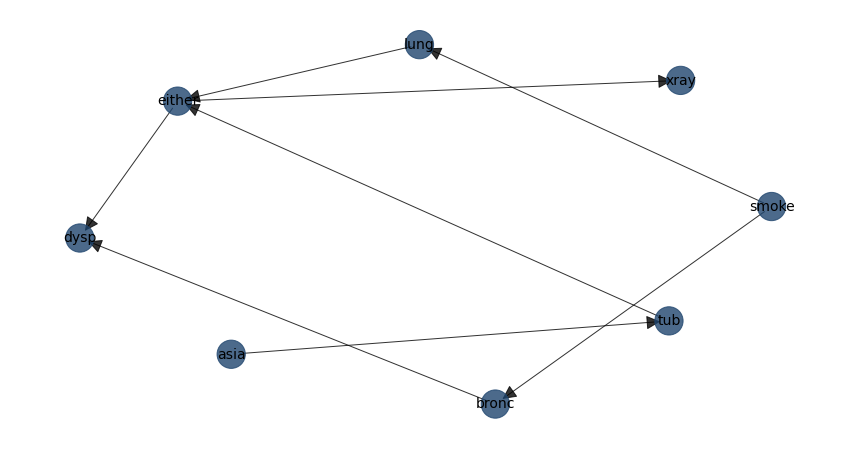

{'G': <networkx.classes.digraph.DiGraph at 0x7f5b33059dd0>,
 'edge_properties': {('asia', 'tub'): {'color': '#000000', 'weight': 1},
  ('bronc', 'dysp'): {'color': '#000000', 'weight': 1},
  ('either', 'dysp'): {'color': '#000000', 'weight': 1},
  ('either', 'xray'): {'color': '#000000', 'weight': 1},
  ('lung', 'either'): {'color': '#000000', 'weight': 1},
  ('smoke', 'bronc'): {'color': '#000000', 'weight': 1},
  ('smoke', 'lung'): {'color': '#000000', 'weight': 1},
  ('tub', 'either'): {'color': '#000000', 'weight': 1}},
 'node_properties': {'asia': {'node_color': '#1f456e', 'node_size': 800},
  'bronc': {'node_color': '#1f456e', 'node_size': 800},
  'dysp': {'node_color': '#1f456e', 'node_size': 800},
  'either': {'node_color': '#1f456e', 'node_size': 800},
  'lung': {'node_color': '#1f456e', 'node_size': 800},
  'smoke': {'node_color': '#1f456e', 'node_size': 800},
  'tub': {'node_color': '#1f456e', 'node_size': 800},
  'xray': {'node_color': '#1f456e', 'node_size': 800}},
 'pos':

In [76]:
# Plotting sampled data
bn.plot(model_learned, pos=G['pos'])

[bnlearn] >Existing coordinates from <pos> are used.


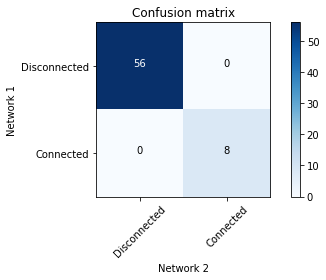

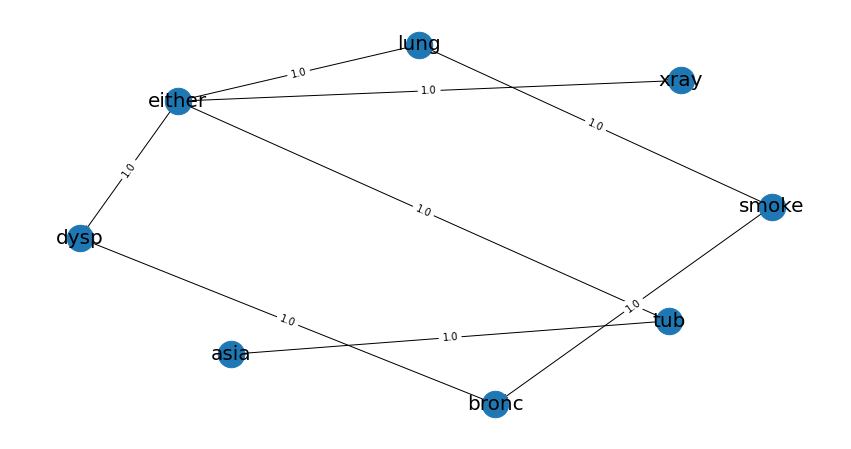

(array([[56,  0],
        [ 0,  8]]), target  asia  tub  smoke  lung  bronc  either  xray  dysp
 source                                                   
 asia       0    1      0     0      0       0     0     0
 tub        0    0      0     0      0       1     0     0
 smoke      0    0      0     1      1       0     0     0
 lung       0    0      0     0      0       1     0     0
 bronc      0    0      0     0      0       0     0     1
 either     0    0      0     0      0       0     1     1
 xray       0    0      0     0      0       0     0     0
 dysp       0    0      0     0      0       0     0     0)

In [77]:
# Comparing the both networks and plotting
bn.compare_networks(model_true, model_learned, pos=G['pos'])

**Write a short paragraph stating if you feel that you could use the model at work**

The model Hill Climbing is best to use in work and for long datasets.It creates more data nodes.It implements a greedy local search that start from DAG and perfomed iteratvely and terminates when the score is maximum.It can be used for Artifical Intelligence datasets and it will give the best result